In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# Download the Shampoo Sales dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv"
df = pd.read_csv(url)

# Save it as 'shampoo-sales.csv'
df.to_csv('shampoo-sales.csv', index=False)

print("Dataset downloaded and saved as 'shampoo-sales.csv'.")

# Preview the data
print(df.head())


Dataset downloaded and saved as 'shampoo-sales.csv'.
  Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3


Root Mean Squared Error (RMSE): 142.531


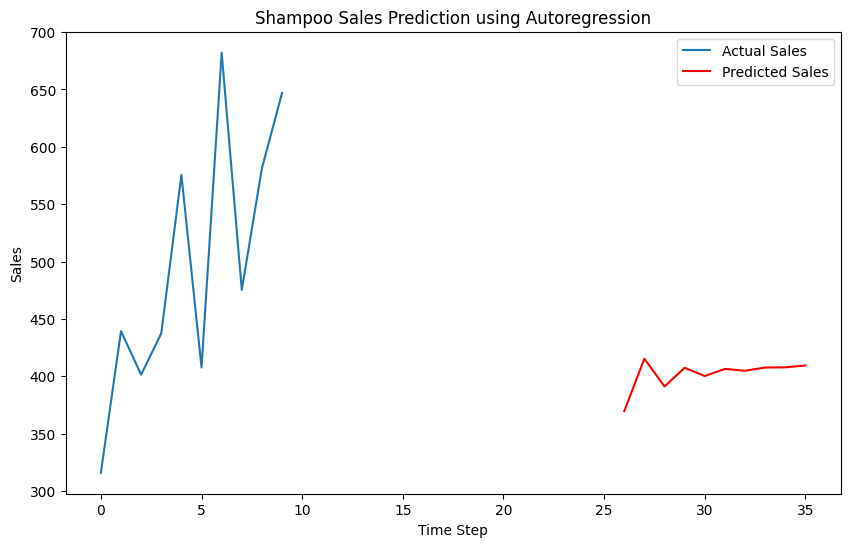

In [2]:
# Load the dataset
df = pd.read_csv('shampoo-sales.csv')

# Convert 'Month' to datetime if needed (optional for better time handling)
# df['Month'] = pd.to_datetime(df['Month'])

# Extract sales data
sales = df['Sales']

# Split data into train and test
train, test = sales[:-10], sales[-10:]

# Fit the AutoRegression model
model = AutoReg(train, lags=3)  # lags=3 means we are using past 3 months to predict
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Evaluate predictions
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')

# Plot the actual vs predicted sales
plt.figure(figsize=(10,6))
plt.plot(test.values, label='Actual Sales')
plt.plot(predictions, label='Predicted Sales', color='red')
plt.title('Shampoo Sales Prediction using Autoregression')
plt.xlabel('Time Step')
plt.ylabel('Sales')
plt.legend()
plt.show()
